In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
# from sklearn.metrics import accuracy_score

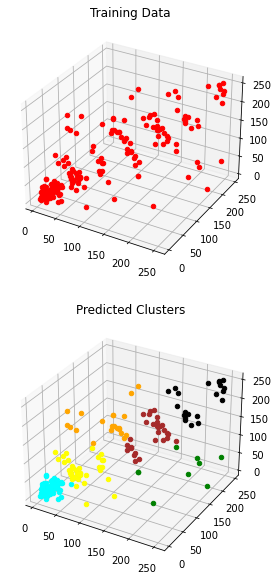

In [21]:
df = pd.read_csv("../data_sandstorm.csv")
bottom_df = df.loc[(df['name']=='Pants') | 
                   (df['name']=='Shorts') |
                   (df['name']=='Jeans')]

X = []
for i, row in bottom_df.iterrows():
    rgb = (row['r'], row['g'], row['b'])
    X.append(rgb)

# # initialize kmeans class
# kmeans = KMeans(
#     init="random",
#     n_clusters=2,
#     n_init=10,
#     max_iter=300,
#     random_state=42)

# n = 5

# create dataset
# X, y = make_blobs(n_samples=200, centers=n, n_features=3,
#                   cluster_std=3.5, random_state=42)

sil_score_max = -1 #this is the minimum possible score
best_n_clusters = 0
model = None

for n_clusters in range(2, 10):
    curr_model = KMeans(n_clusters = n_clusters, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)
    labels = curr_model.fit_predict(X)
    sil_score = silhouette_score(X, labels)
#     print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
    if sil_score > sil_score_max:
        sil_score_max = sil_score
        best_n_clusters = n_clusters
        model = curr_model
# print("Best n clusters:", best_n_clusters)

model = KMeans(n_clusters = 6, 
                        init='random', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=42)

# fit data and generate predictions
model.fit(X)
y_pred = model.labels_

#plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.set_title("Training Data")
ax1 = fig.add_subplot(212, projection='3d')
ax1.set_title("Predicted Clusters")

colors_train = {0 : 'blue', 1 : 'red', 2 : 'purple', 3 : 'yellow', 4 : 'black', 5 : 'orange', 6 : 'pink'}
colors_pred = {0 : 'green', 1 : 'brown', 2 : 'cyan', 3 : 'yellow', 4 : 'black', 5 : 'orange', 6 : 'pink'}

for i, p in enumerate(X):
    px, py, pz = p
#     c_train = np.array([[X[0], 0, 0], [0, X[1], 0], [0, 0, X[2]]])
    c_pred = colors_pred[y_pred[i]]
    ax.scatter(px, py, pz, c="red")
    ax1.scatter(px, py, pz, c=c_pred)

plt.show()

In [33]:
# Count points in each cluster

print("Total data points:", len(X), '\n')

c = Counter(y_pred)
counts = c.most_common()
for t in counts:
    print(colors_pred[t[0]], t[1])
    
tup_max = max(counts, key=lambda x : x[1])
print()
print("Densest cluster:", colors_pred[tup_max[0]])

Total data points: 197 

cyan 77
yellow 39
brown 30
black 21
orange 21
green 9

Densest cluster: cyan
